<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW09 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due 4/18/25 </b> </font></h1>
    
</div>
</center>

<br>

<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>


## Your Name: Victor Allen

## Your ID: 132107570


## 1. Summary


1.(50 pts) Used the euler method to solve a diff eq, and created the required plots.

2.(35 pts) Applied the centered difference scheme to a diff eq to derive the fibonacci sequence, then ued the euler method to discretize the ode.

3.(15 pts) Found a numerical solution for an equation, then plotted it and substituted a function, and plotted the values of that too.

5.(15 pts) Discussed the simmilarites between the residual layer and the euler method and how they are connected.


## 2. Methodology


1. Wrote a function for the euler method and defined all the nessecary variables. Then used two different delta ts and found the analytical solution, then plotted those and the analytical solution for comparison. Computed the error for both dts, the .001 step performed signifigantly better. Also computed the growth rates of the numerical expressions using the equation provided. I couldnt print it because the step of .001 was too small and the output looked extremley spiky because of precision, so I printed a report instead, and found that the growth rates are close to the expected value of sigma.

2. Applied the centered difference scheme to the ode dZ/dt = sigma Z, and derived the Fibonacci sequence to find that delta t = (2 sigma)^-1. Then I used the euler method to the equation dX/dt = sigma X(1 - X), and found its logistic mapping, and found rho as a function of sigma delta t, and expressesd X_n in terms of sigma delta t and Y_n

3. Computed the Numerical solution and used the assigned parameters, and plotted it. Then substituted the new equation into the origialn and obtained a solution in terms of rho and plotted it.

4. Discussed the simmilarities of the add residual layers and the euler methods.


## 3. Code and Results (e.g., Tables, Figures, Outputs)


### Results for Question 1 (within a Markdown cell)


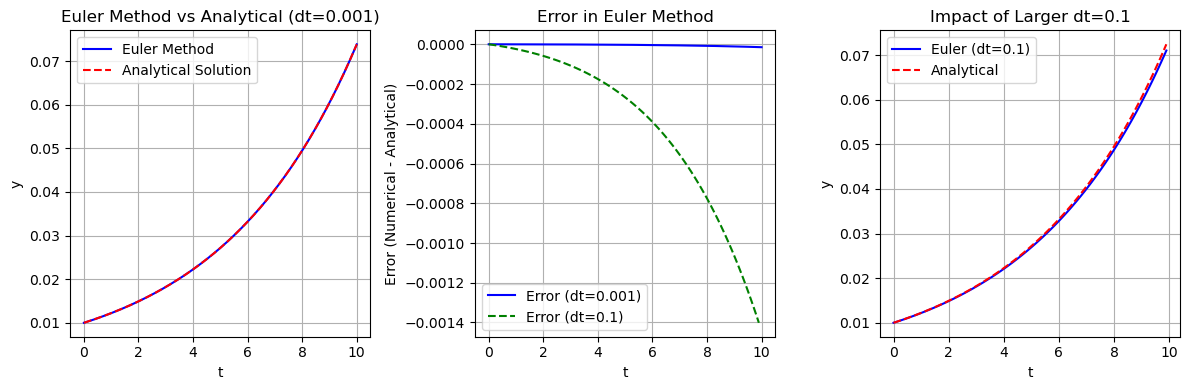

Growth Rates for dt=0.001: 0.2000 ± 0.0000
Growth Rates for dt=0.1: 0.2000 ± 0.0000


In [15]:
import numpy as np
import matplotlib.pyplot as plt

sigma = .2 
y0 = .01
tStart = 0
tEnd = 10

dtSmall = .001
dtLarge = .1

def eulerMethod(dt):
    t = np.arange(tStart, tEnd, dt)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(1, n):
        y[i] = y[i - 1] + dt * sigma * y[i-1]

    return t,y

def analyticSolution(t):
    return y0 * np.exp(sigma * t)

tSmall, ySmall = eulerMethod(dtSmall)
tLarge, yLarge = eulerMethod(dtLarge)

yAnalyticSmall = analyticSolution(tSmall)
yAnalyticLarge = analyticSolution(tLarge)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(tSmall, ySmall, 'b-', label='Euler Method')
plt.plot(tSmall, yAnalyticSmall, 'r--', label='Analytical Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler Method vs Analytical (dt=0.001)')
plt.legend()
plt.grid(True)

diff_small = ySmall - yAnalyticSmall
diff_big = yLarge - yAnalyticLarge
plt.subplot(1, 3, 2)
plt.plot(tSmall, diff_small, 'b-', label='Error (dt=0.001)')
plt.plot(tLarge, diff_big, 'g--', label='Error (dt=0.1)')
plt.xlabel('t')
plt.ylabel('Error (Numerical - Analytical)')
plt.title('Error in Euler Method')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(tLarge, yLarge, 'b-', label='Euler (dt=0.1)')
plt.plot(tLarge, yAnalyticLarge, 'r--', label='Analytical')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Impact of Larger dt=0.1')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

def computeGrowthRates(y, dt):
    n = len(y)
    rates = np.zeros(n - 1)
    for i in range(n - 1):
        rates[i] = (y[i + 1] - y[i]) / (dt * y[i])
    return rates


growthRatesSmall = computeGrowthRates(ySmall, dtSmall)
growthRatesBig = computeGrowthRates(yLarge, dtLarge)

print(f"Growth Rates for dt=0.001: {np.mean(growthRatesSmall):.4f} ± {np.std(growthRatesSmall):.4f}")
print(f"Growth Rates for dt=0.1: {np.mean(growthRatesBig):.4f} ± {np.std(growthRatesBig):.4f}")



### Results for Question 2 (within a Markdown cell)


Part A


$$ \frac{dZ}{dt} = \sigma Z $$


$$ \frac{Z*{n+1} - Z*{n-1}}{2\Delta t} \approx \sigma Z_n $$


$$ Z*{n+1} = Z*{n-1} + 2 \sigma \Delta t Z_n $$


To find a Fibonacci like recurrence:
$$Z_{n+1} = Z_{n-1} + Z_n $$


The equation above would match if:
$$2\sigma \Delta t = 1$$


thus:
$$\Delta t = (2\sigma)^{-1}$$


Part B


$$\frac{dX}{dt} = \sigma X(1-X)$$


Applying Euler Method:
$$\frac{X_{n+1} - X_{n}}{\Delta t} \approx \sigma X_n(1-X_n) $$


Rearrage to get:
$$X_{n+1} = X_n + \sigma \Delta t X_n(1-X_n) $$


$$ X\_{n+1} = X_n + \sigma \Delta t X_n - \sigma \Delta t X^2_n $$


$$ X\_{n+1} = (1+\sigma \Delta t)X_n - \sigma \Delta t X^2_n$$


The logistic map has the form:
$$Y_{n+1} = \rho Y_n(1-Y_n)$$


Let:
$$ Y_n = \alpha X_n $$
Then:
$$X_n = \frac{Y_n}{\alpha} $$


Substituting:
$$ \frac{Y\_{n+1}}{\alpha} = \frac{Y_n}{\alpha}(1+\sigma \Delta t - \sigma \Delta t(\frac{Y_n}{\alpha}))$$


$$Y_{n+1} = Y_n(1 + \sigma \Delta t) - \frac{\sigma \Delta t}{\alpha}Y_n $$


We want to have the form:
$$Y_{n+1} = \rho Y_n - \rho Y^2_n $$


For the linear term:
$$ 1 + \sigma \Delta t = \rho $$
For the quadratic term: 
$$ \frac{\sigma \Delta t}{\alpha} = \rho $$


Therefore:
$$ 1 + \sigma \Delta t = \frac{\sigma \Delta t}{\alpha} $$
$$ \alpha = \frac{\sigma \Delta t}{1 + \sigma \Delta t} $$


The change of variable becomes:

$$ Y_n = \frac{\sigma \Delta t}{1+\sigma \Delta t} X_n $$

or:

$$ X_n = \frac{1+\sigma \Delta t}{\sigma \Delta t} Y_n$$


After this transformation, the discretized equation takes the standard logistic map form:
$$ Y\_{n+1} = \rho Y_n (1 - Y_n)$$
with
$$\rho = 1 + \sigma \Delta t$$


### Results for Question 3 (within a Markdown cell)


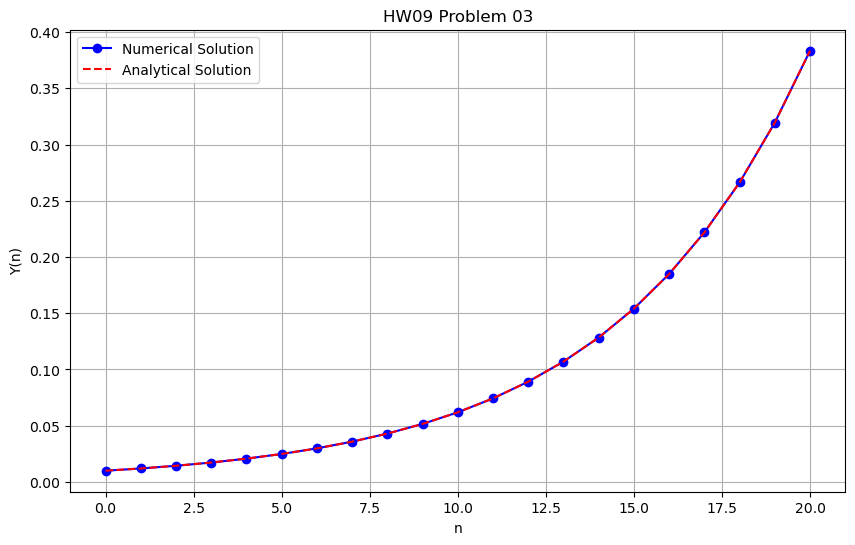

In [14]:
y0 = .01

rho = 1.2

nMax = 20

def numericalSolution():
    Y = np.zeros(nMax + 1)

    Y[0] = y0

    for n in range(nMax):
        Y[n + 1] = rho * Y[n]
    
    return Y

nValues = np.arange(nMax + 1)

YNumerical = numericalSolution()

# Y(n) = lambda ^ n
# Y(n + 1) = rho * Y(n)
# lambda ^ (n + 1) = rho * lambda ^ n
# lambda = rho
# Y(n) = rho ^ n

YAnalytic = y0 * ( rho ** nValues)

plt.figure(figsize=(10, 6))

plt.plot(nValues,YNumerical, 'bo-', label='Numerical Solution')
plt.plot(nValues,YAnalytic, 'r--', label='Analytical Solution')
plt.xlabel('n')
plt.ylabel('Y(n)')
plt.title('HW09 Problem 03')
plt.grid(True)
plt.legend()




### Question 5


The "Add" in a transformer architencure is a skip conneciton that adds the input to the processed output. It helps the network focus on learning changes to the input rather than an entire transform from scratch.

In the Euler method, one updates a state with $$ Y\_{n+1} = Y_n + \Delta t \* f(Y_n)$$

a residual block updates the input with $$Y_{n+1} = Y_n + F(Y_n)$$

with $$\Delta t = 1$$ The two formuaitons match. Therefore each layer in a residual network can be seen as approximating a step in the integration of a diff eq
